In [50]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [55]:
# Open CSV file
with open('dataset\Restaurant_Sales_Data-Cleaned_Data.csv', newline='') as csvfile:
    # Create CSV reader object
    csv_reader = csv.reader(csvfile, delimiter=',')
    
    # Skip header row
    next(csv_reader)
    
    # Initialize empty list
    rows = []
    
    # Iterate over each row and append data to list
    for row in csv_reader:
        rows.append(row)

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows, columns=["Dates", "Net Sales", "% Noodles", "Weekdays"])

# Print the DataFrame
# print(df)

In [56]:
# Convert columns to correct format
df['Dates'] = pd.to_datetime(df['Dates'])
df['Net Sales'] = df['Net Sales'].astype(float)
df['% Noodles'] = df['% Noodles'].astype(float)

# Filter data for Event_df and nonEvent_df
Event_df = df[(df['Dates'] >= '2023-07-16') & (df['Dates'] <= '2023-08-31')]
nonEvent_df = df[(df['Dates'] < '2023-07-16') | (df['Dates'] > '2023-08-31')]

# Print the filtered DataFrame
#print(nonEvent_df)
#print(Event_df)

## Data Analysis

### Percent Noodle Distribution during Event vs. Non-event periods

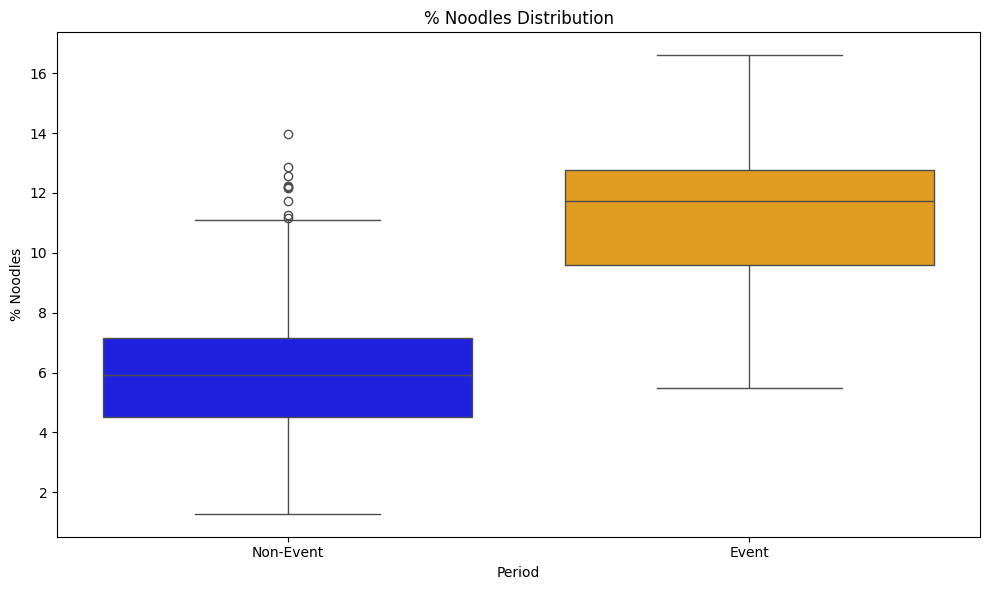

In [80]:
# Created Copies of nonEvent_df and Event_df 
nonEvent_df = nonEvent_df.copy()
Event_df = Event_df.copy()

# Add 'Period' column to both DataFrames
nonEvent_df['Period'] = 'Non-Event'
Event_df['Period'] = 'Event'

# Concatonate into single DF to keep period attributes
combined_df = pd.concat([nonEvent_df, Event_df])

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot box plot for 'Net Sales' based on Period
sns.boxplot(x='Period', y='% Noodles', data=combined_df, hue='Period', palette={'Non-Event': 'blue', 'Event': 'orange'}, legend=False)

# Set labels and title
plt.xlabel('Period')
plt.ylabel('% Noodles')
plt.title('% Noodles Distribution')

# Show plot
plt.tight_layout()
plt.show()

### Net Sales during Event vs. Non-event periods

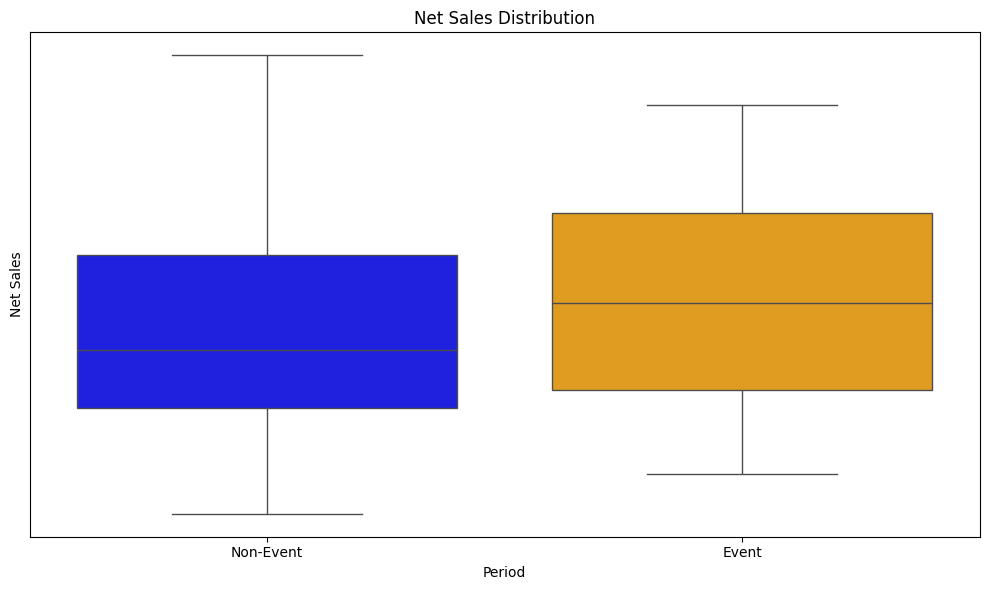

In [74]:
# Created Copies of nonEvent_df and Event_df 
nonEvent_df = nonEvent_df.copy()
Event_df = Event_df.copy()

# Add 'Period' column to both DataFrames
nonEvent_df['Period'] = 'Non-Event'
Event_df['Period'] = 'Event'

# Concatonate into single DF to keep period attributes
combined_df = pd.concat([nonEvent_df, Event_df])

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot combined box plot for 'Net Sales' based on Period
sns.boxplot(x='Period', y='Net Sales', data=combined_df, hue='Period', palette={'Non-Event': 'blue', 'Event': 'orange'}, legend=False)

# Set labels and title
plt.xlabel('Period')
plt.ylabel('Net Sales')
plt.title('Net Sales Distribution')

# Hide ticks and labels on the y-axis
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Show plot
plt.tight_layout()
plt.show()

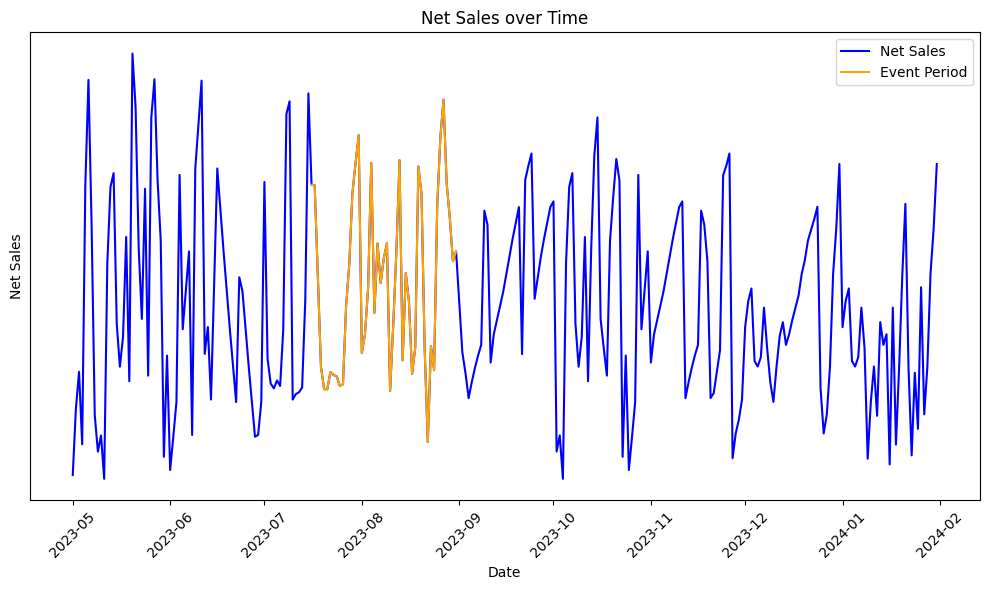

In [64]:
# Create a mask for the specific date range
mask = (df['Dates'] >= '2023-07-16') & (df['Dates'] <= '2023-08-31')

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot 'Net Sales' for nonEvent_df
plt.plot(df['Dates'], df['Net Sales'], label='Net Sales', color='blue')

# Plot 'Net Sales' for the event period with different color
plt.plot(df[mask]['Dates'], df[mask]['Net Sales'], color='orange', label='Event Period')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.title('Net Sales over Time')
plt.legend()

# Remove ticks from y-axis to maintain confidentiality
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
###

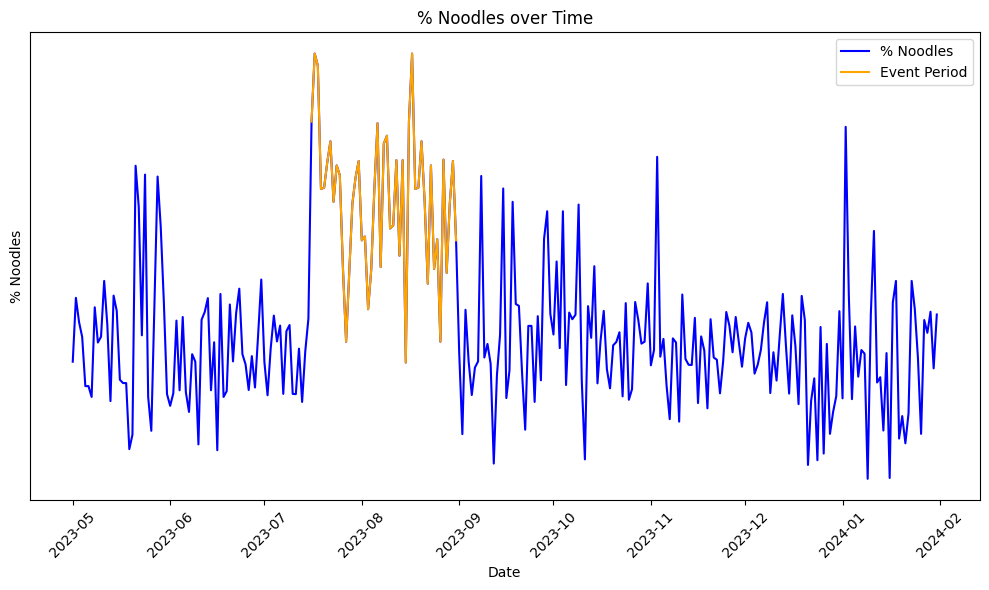

In [75]:
# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot '% Noodles' for the entire period
plt.plot(df['Dates'], df['% Noodles'], label='% Noodles', color='blue')

# Plot '% Noodles' for the event period with a different color
plt.plot(df[mask]['Dates'], df[mask]['% Noodles'], color='orange', label='Event Period')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('% Noodles')
plt.title('% Noodles over Time')
plt.legend()

# Remove ticks from y-axis
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()